In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv(r'C:\Users\DELL\Pictures\car_price.csv\car_age_price.csv')

In [4]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [5]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [6]:
data.shape

(112, 2)

In [7]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [8]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

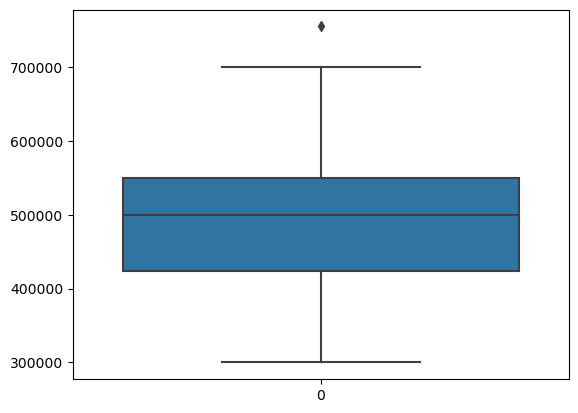

In [10]:
sns.boxplot(data['Price'])

In [12]:
data[data['Price']>700000]

,Year,Price
1,2019,755000


In [16]:
x=data.drop('Price',axis=1) 
y=data['Price'] 

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 50)

In [18]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
model = lr.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [19]:
y_pred,y_test

(array([319050.94271651, 503919.65159993, 550136.82882078, 503919.65159993,
        503919.65159993, 503919.65159993, 503919.65159993, 503919.65159993,
        457702.47437906, 550136.82882078, 365268.11993736, 596354.00604163,
        503919.65159993, 596354.00604163, 642571.18326248, 411485.29715821,
        503919.65159993, 365268.11993736, 411485.29715821, 642571.18326248,
        503919.65159993, 503919.65159993, 596354.00604163, 550136.82882078,
        550136.82882078, 503919.65159993, 503919.65159993, 503919.65159993]),
 50     325000
 16     500000
 42     550000
 25     550000
 65     495000
 62     540000
 75     490000
 74     490000
 59     550000
 47     450000
 58     450000
 21     500000
 34     450000
 44     550000
 98     700000
 72     300000
 17     550000
 108    300000
 77     325000
 39     545000
 15     500000
 61     540000
 18     500000
 38     475000
 3      465000
 87     520000
 12     500000
 8      509999
 Name: Price, dtype: int64)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

3818751596.873309
0.47558207318861834


In [21]:
model.predict([[2022]])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([735005.5377042])

In [22]:
 #Fitting the data to Lasso Regression and predicting the price values.
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=0.5)
lsmodel = lasso.fit(x_train,y_train)
ls_ypred = lsmodel.predict(x_test)

In [23]:
ls_ypred,y_test

(array([319051.64287312, 503919.56231819, 550136.54217947, 503919.56231819,
        503919.56231819, 503919.56231819, 503919.56231819, 503919.56231819,
        457702.58245693, 550136.54217947, 365268.6227344 , 596353.52204072,
        503919.56231819, 596353.52204072, 642570.501902  , 411485.60259566,
        503919.56231819, 365268.6227344 , 411485.60259566, 642570.501902  ,
        503919.56231819, 503919.56231819, 596353.52204072, 550136.54217947,
        550136.54217947, 503919.56231819, 503919.56231819, 503919.56231819]),
 50     325000
 16     500000
 42     550000
 25     550000
 65     495000
 62     540000
 75     490000
 74     490000
 59     550000
 47     450000
 58     450000
 21     500000
 34     450000
 44     550000
 98     700000
 72     300000
 17     550000
 108    300000
 77     325000
 39     545000
 15     500000
 61     540000
 18     500000
 38     475000
 3      465000
 87     520000
 12     500000
 8      509999
 Name: Price, dtype: int64)

In [25]:
 # mean squared error and r2 score
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,ls_ypred))
print(r2_score(y_test,ls_ypred))
    

3818739190.0604897
0.4755837769797375


In [26]:
# Checking the same model after MinMax scaling.
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler()
x= minmax.fit_transform(x)
x=pd.DataFrame(x)


In [27]:
x.describe()


,0
count,112.000000
mean,0.524235
std,0.232802
min,0.000000
25%,0.285714
50%,0.571429
75%,0.571429
max,1.000000


In [28]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
model = lr.fit(x_train,y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

3818751596.873309
0.47558207318861834


In [30]:
#Checking the prediction after removing outlier.
car1=data.drop(1)

In [31]:
car1.head()

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000


In [32]:
x1=car1.drop('Price',axis=1)
y1=car1['Price']

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x1,y1,test_size=0.25,random_state= 50)

In [34]:
model = lr.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(mean_squared_error(ytest,ypred))
print(r2_score(ytest,ypred))

3324279356.930936
0.5003188556697928


In [35]:
lsmodel = lasso.fit(x_train,y_train)
ls_ypred = lsmodel.predict(x_test)
print(mean_squared_error(y_test,ls_ypred))
print(r2_score(y_test,ls_ypred))

3818739190.0604897
0.4755837769797375
